_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
__________

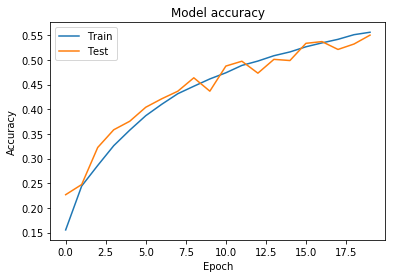

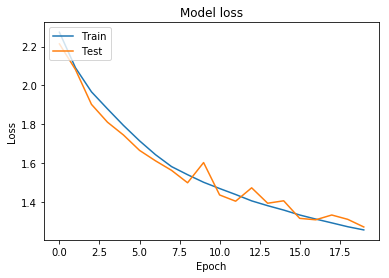

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import cifar10


# load cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
# image is processed as is (square grayscale)
input_shape = x_train.shape[1:]
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 128
dropout = 0.2
epochs = 20

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
#plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
history = model.fit(x_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))



# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
